In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [26]:
def plot(df):
    # Now create plots with the proper column structure
    plt.figure(figsize=(15, 30))
    
    # Plot 1: Time vs Angle
    plt.subplot(3, 1, 1)
    plt.scatter(df['time'], df['angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    # Plot 2: Time vs Position
    plt.subplot(3, 1, 2)
    plt.plot(df['time'], df['position'], marker='s', linestyle='-', color='red')
    plt.title('Time vs Position Motor')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.grid(True)
    
    # Plot 3: Time vs Voltage
    plt.subplot(3, 1, 3)
    plt.plot(df['time'], df['voltage'], marker='^', linestyle='-', color='green')
    plt.title('Time vs Voltage')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    
def plot_p_d(df):
    # Now create plots with the proper column structure
    plt.figure(figsize=(15, 30))
    
    # Plot 1: Time vs Angle
    """plt.subplot(5, 1, 1)
    plt.scatter(df['time'], df['angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    plt.subplot(5, 1, 2)
    plt.scatter(df['time'], df['pendulum_angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)"""
    
    plt.subplot(3, 1, 1)
    plt.scatter(df['time'], df['unwrapped_pendulum_angle'], marker='o', linestyle='-', color='blue')
    plt.title('Time vs Angle Pendulum')
    plt.xlabel('Time')
    plt.ylabel('Angle (degrees)')
    plt.grid(True)
    
    # Plot 2: Time vs Position
    plt.subplot(3, 1, 2)
    plt.plot(df['time'], df['position'], marker='s', linestyle='-', color='red')
    plt.title('Time vs Position Motor')
    plt.xlabel('Time')
    plt.ylabel('Position')
    plt.grid(True)
    
    # Plot 3: Time vs Voltage
    plt.subplot(3, 1, 3)
    plt.plot(df['time'], df['voltage'], marker='^', linestyle='-', color='green')
    plt.title('Time vs Voltage')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


def process_excel_csv(filename):
    try:
        # Read the Excel file
        excel_file = pd.ExcelFile(filename)
        df_raw = excel_file.parse(sheet_name=0)
        
        # Extract the column name to get the header
        header = df_raw.columns[0]
        column_names = header.split(',')
        
        # Create a new DataFrame by splitting the values in each row
        data_rows = []
        for _, row in df_raw.iterrows():
            # Split the string by commas and convert to appropriate types
            values = row[0].split(',')
            data_rows.append(values)
        
        # Create the properly structured DataFrame
        df = pd.DataFrame(data_rows, columns=column_names)
        
        # Convert columns to numeric (this will handle strings with decimal points)
        for col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='ignore')
            
        print(f"Successfully processed {filename}")
        return df
    
    except Exception as e:
        print(f"Error processing {filename}: {e}")
        return None
def convert_angle_to_original(transformed_angle):
    if transformed_angle > 0:
        original_angle = transformed_angle + 180
    else:
        original_angle = transformed_angle - 180
        
    # Ensure angle stays in the range [-180, 180]
    if original_angle > 180:
        original_angle -= 360
    elif original_angle <= -180:
        original_angle += 360
        
    return original_angle

# Function to process data and add the original angle column
def process_pendulum_data(df):
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Convert the angle column back to the original reading
    processed_df['pendulum_angle'] = processed_df['angle'].apply(convert_angle_to_original)
    
    return processed_df

# Example usage
def process_all_dataframes(df_dict):
    result_dict = {}
    for name, df in df_dict.items():
        result_dict[name] = process_pendulum_data(df)
        print(f"Processed {name}: Added original_angle column")
    return result_dict

def process_and_save_angles(df, filename="processed_angles.csv"):
    # Make a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Make sure original_angle is calculated
    if 'pendulum_angle' not in processed_df.columns:
        # Calculate original angle
        processed_df['pendulum_angle'] = processed_df['angle'].apply(convert_angle_to_original)
    
    # Create an unwrapped version of the angle to avoid discontinuities
    # Convert to radians, unwrap, then convert back to degrees
    angle_rad = np.radians(processed_df['pendulum_angle'])
    unwrapped_angle_rad = np.unwrap(angle_rad)
    processed_df['unwrapped_pendulum_angle'] = np.degrees(unwrapped_angle_rad)
    
    # Keep only the columns we want, including voltage
    result_df = processed_df[['time', 'angle', 'position', 'pendulum_angle', 'unwrapped_pendulum_angle', 'voltage']]
    
    # Save to CSV
    result_df.to_csv(filename, index=False)
    print(f"Saved processed angles and voltage to {filename}")
    
    return result_df



In [27]:
# Process data1.xlsx through data6.xlsx
df_dict = {}  # Dictionary to hold all dataframes
missing_files = []  # List to track missing files

    
# Process each file
for i in range(1, 7):
    filename = f'data{i}.xlsx'
    
    if os.path.exists(filename):
        # Create the dataframe and add it to our dictionary
        df = process_excel_csv(filename)
        if df is not None:
            # Add to dictionary with name df1, df2, etc.
            df_dict[f'df{i}'] = df
    else:
        missing_files.append(filename)
        print(f"File {filename} not found")

# Extract dataframes to individual variables (df1, df2, etc.)
# This assigns each dataframe to a variable with its corresponding name
for name, df in df_dict.items():
    globals()[name] = df


# Process and save each dataframe
for i, (name, df) in enumerate(df_dict.items()):
    output_filename = f"{name}.csv"
    processed_df = process_and_save_angles(df, output_filename)
    print(f"Processed {name}: First few rows:")
    print(processed_df.head())
    print("\n")
# Process each file
for i in range(1, 7):
    filename = f'data{i}.xlsx'
    
    if os.path.exists(filename):
        # Create the dataframe and add it to our dictionary
        df = process_excel_csv(filename)
        if df is not None:
            # Add to dictionary with name df1, df2, etc.
            df_dict[f'df{i}'] = df
    else:
        missing_files.append(filename)
        print(f"File {filename} not found")


Successfully processed data1.xlsx
Successfully processed data2.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:

Successfully processed data3.xlsx

C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating 


Successfully processed data4.xlsx
Successfully processed data5.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Successfully processed data6.xlsx
Saved processed angles and voltage to df1.csv
Processed df1: First few rows:
   time   angle  position  pendulum_angle  unwrapped_pendulum_angle  voltage
0     9  180.00       0.0            0.00                      0.00     0.00
1    19  179.65       0.0           -0.35                     -0.35    -0.31
2    29  179.12       0.0           -0.88                     -0.88    -0.57
3    39  178.59      -1.0           -1.41                     -1.41    -0.71
4    49  178.24      -1.0           -1.76                     -1.76    -0.59


Saved processed angles and voltage to df2.csv
Processed df2: First few rows:
   time  angle  position  pendulum_angle  unwrapped_pendulum_angle  voltage
0     9  180.0       0.0             0.0                       0.0     0.09
1    19  180.0       0.0             0.0                       0.0     0.04
2    29  180.0       0.0             0.0                       0.0     0.02
3    39  180.0       0.0             0.0    

C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:

Successfully processed data3.xlsx
Successfully processed data4.xlsx
Successfully processed data5.xlsx
Successfully processed data6.xlsx


C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = row[0].split(',')
C:\Users\modes\AppData\Local\Temp\ipykernel_24328\847626791.py:100: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


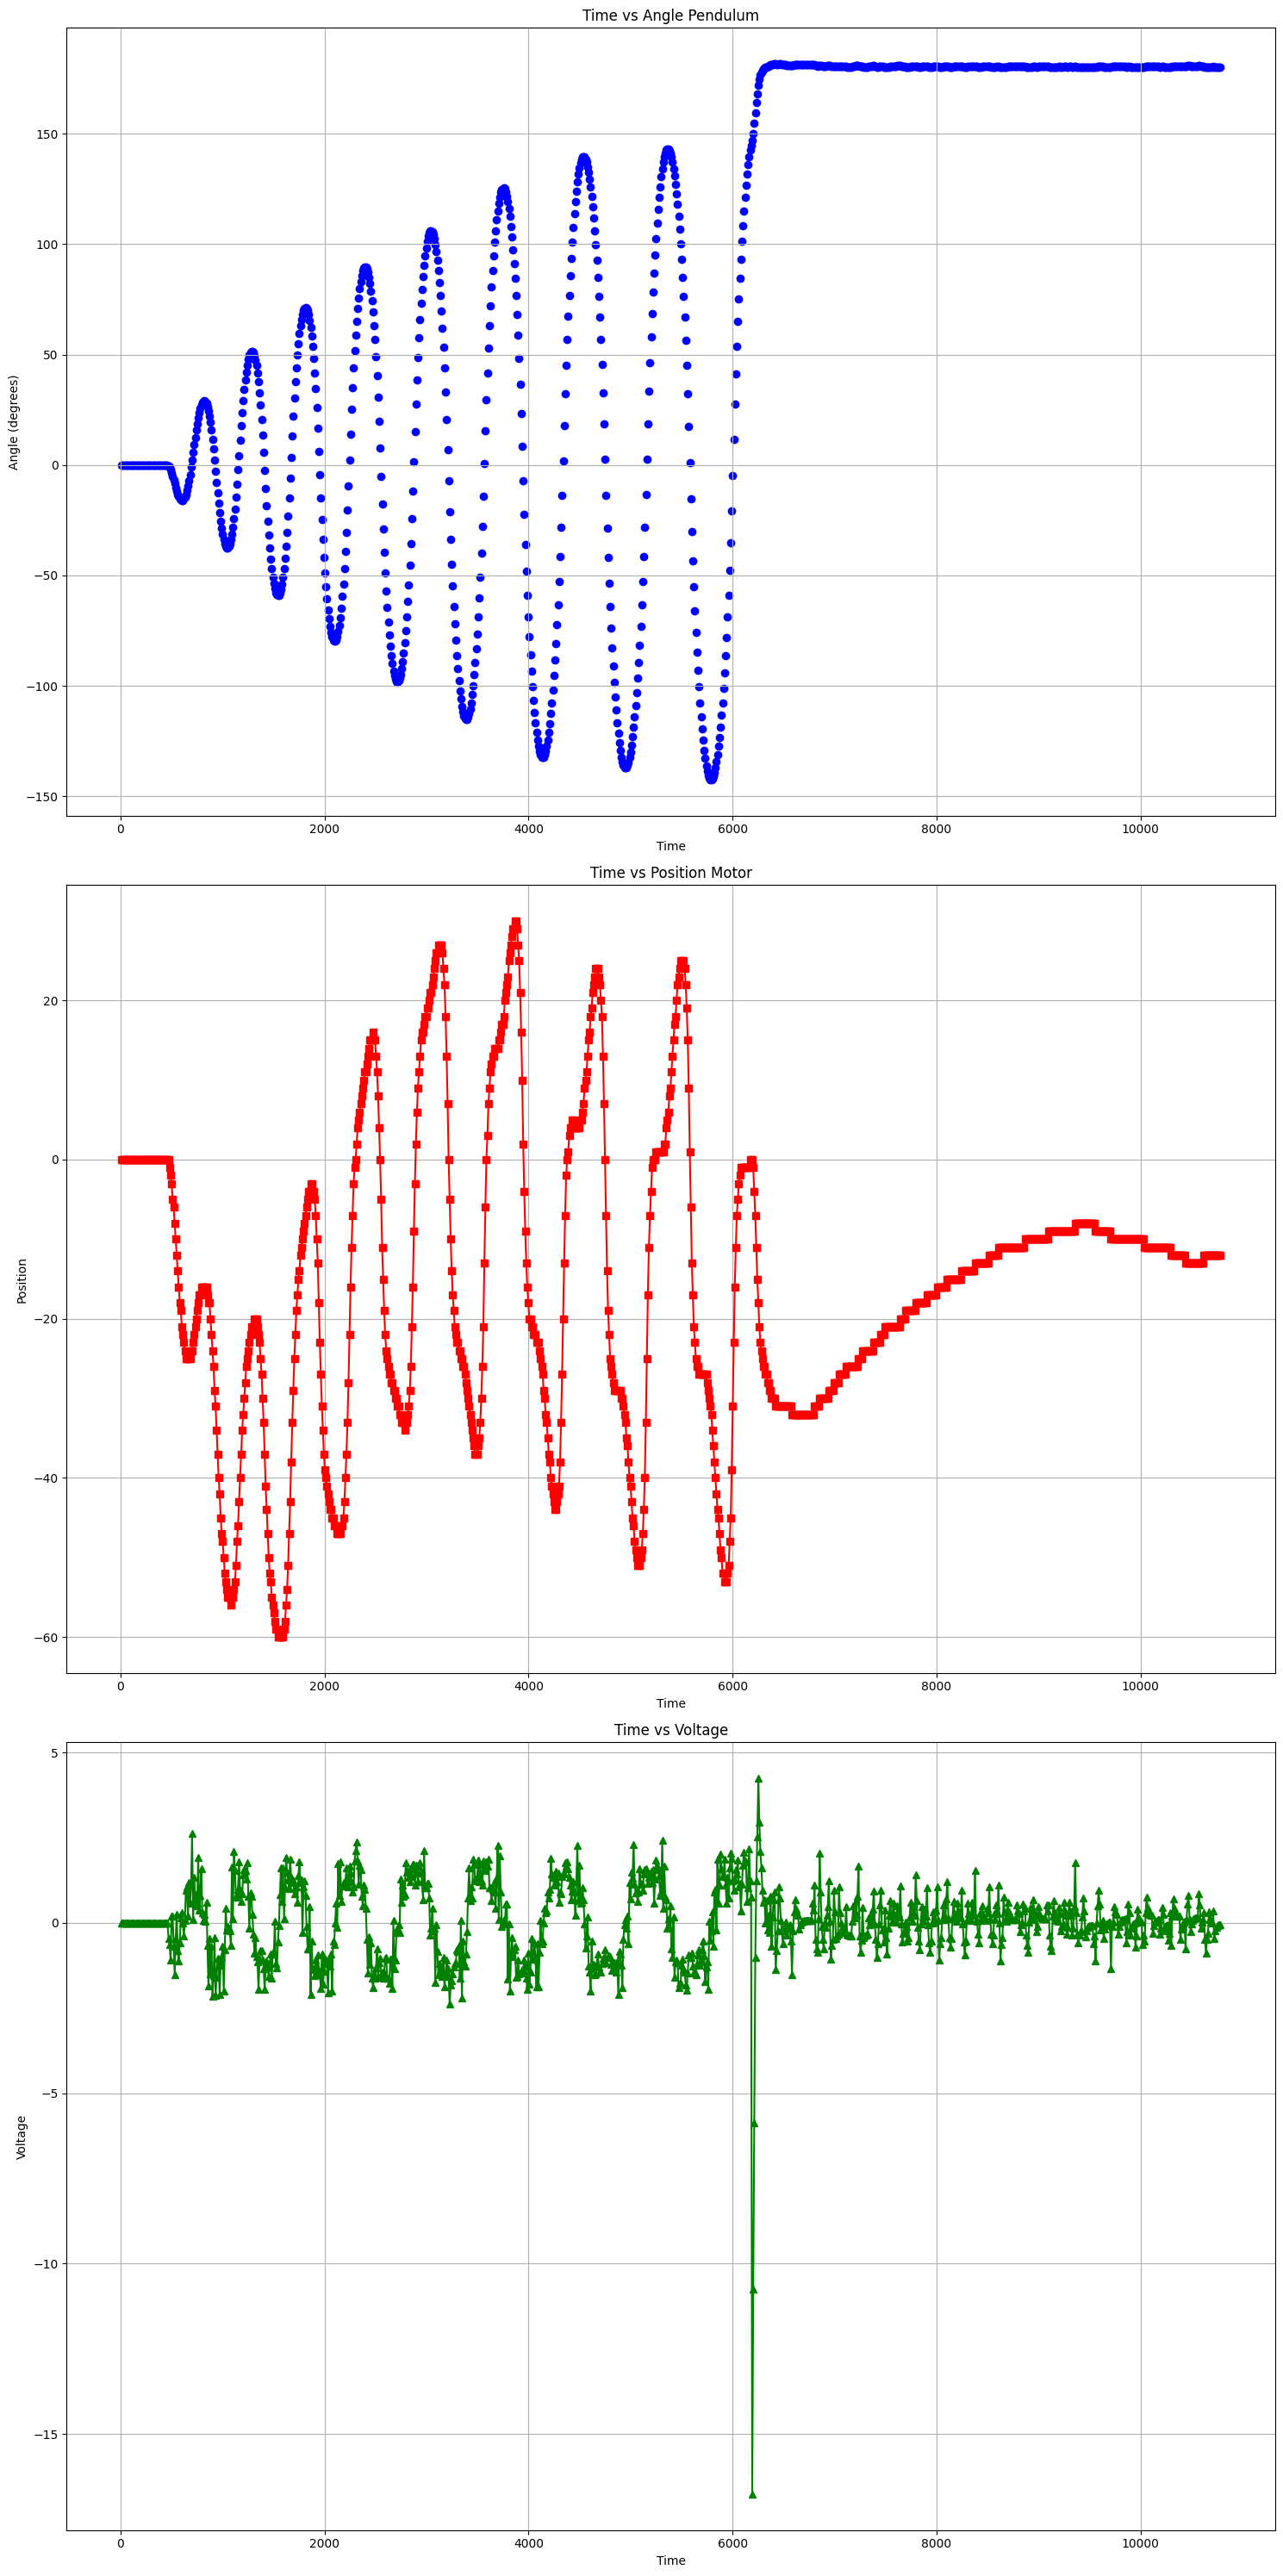

In [33]:
processed_df1 = pd.read_csv("df5.csv")
plot_p_d(processed_df1)